<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [217]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column

# A review of the data as shown below indicates:
#    -  there are 506 rows and 13 columns
#    -  all data types are floats
#    -  there are no missing data or null values
#    -  Overall, no clean up is necessary   

In [3]:
X.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [233]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [234]:
# indicates 506 rows and 13 columns
# indicates that data types are all float
print(X.shape)
(X.dtypes)

(506, 14)


CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

In [226]:
# summary statistics
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [235]:
# no null values were detected
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [227]:
# number of unique values in each column
unique_count = X.nunique(axis=0)
print(unique_count)

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64


## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [4]:
#adding price or MEDV to the data to determine correlation with features
df = X
df['price']= y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


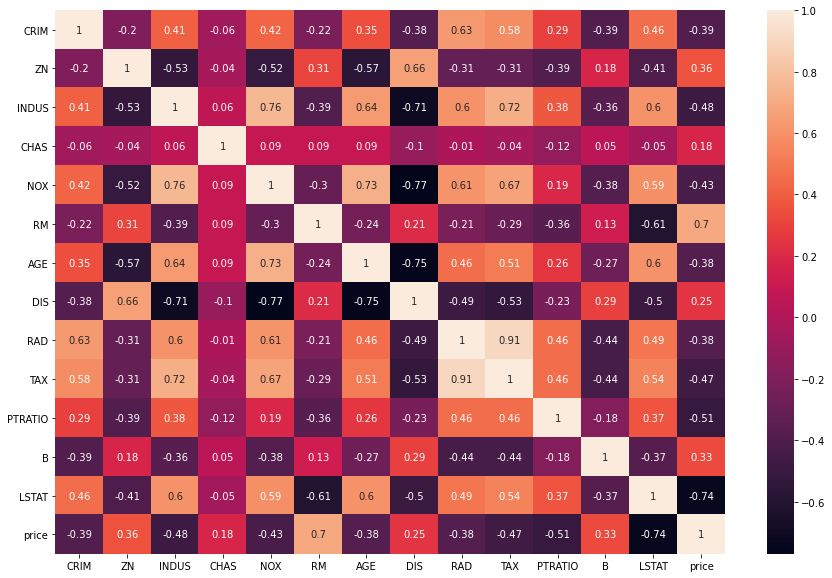

In [6]:
# map indicates that LSAT, PTRATIO, and RM are correlated to price
corr_map = df.corr().round(2)
plt.subplots(figsize=(15,10))
sns.heatmap(data=corr_map, annot=True)
plt.show()

In [937]:
#creating a subset of the items that were best correlated to price
X_subset = X[['LSTAT','PTRATIO','RM']]
X_subset.head()

,LSTAT,PTRATIO,RM
0,4.98,15.3,6.575
1,9.14,17.8,6.421
2,4.03,17.8,7.185
3,2.94,18.7,6.998
4,5.33,18.7,7.147


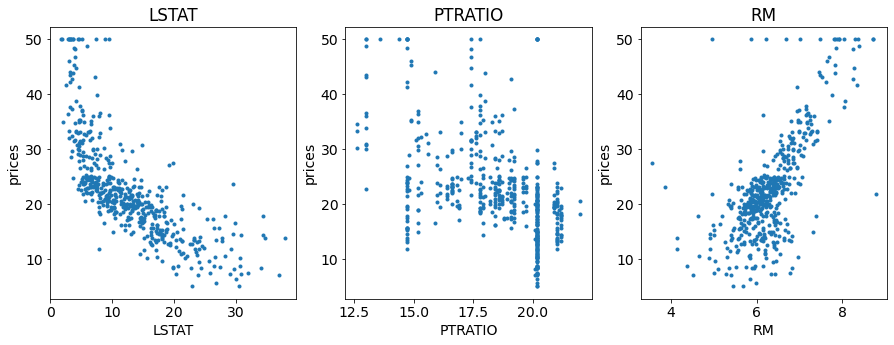

In [416]:
#plots show that the features: LSTAT, PTRATIO, and RM have a correlation with our predicted value MEDV or price
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

for i, col in enumerate(X_subset.columns):
    plt.subplot(1, 3, i+1)
    x = X_subset[col]
    plt.plot(x, y,'.')
    
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [ ]:
#based on the plots and correlation values above, the predictors:  LSTAT, PTRATIO, and RM will be used to predict MEDV 
#or price

### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [532]:
# 70/30 train/test split
X_train_sub, X_test_sub, y_train, y_test = train_test_split(X_subset, y, test_size=0.30, random_state=42)

# instantiate
lm = LinearRegression()

# fit
lm.fit(X_train_sub,y_train)
# predict
predictions_30 = lm.predict(X_test_sub)

# score
lm.score(X_train_sub,y_train)

0.6850018441906278

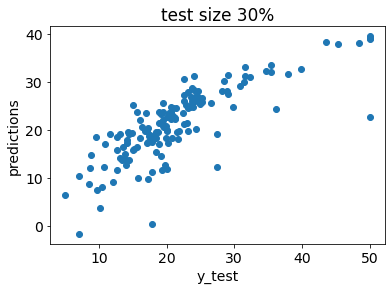

In [533]:
plt.scatter(y_test,predictions_30)
plt.title("test size 30%")
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

In [534]:
# 90/10 train/test split
X_train_sub, X_test_sub, y_train, y_test = train_test_split(X_subset, y, test_size=0.10, random_state=42)

# instantiate
lm = LinearRegression()

# fit
lm.fit(X_train_sub,y_train)
# predict
predictions_10 = lm.predict(X_test_sub)

# score
lm.score(X_train_sub,y_train)

0.6721562320641807

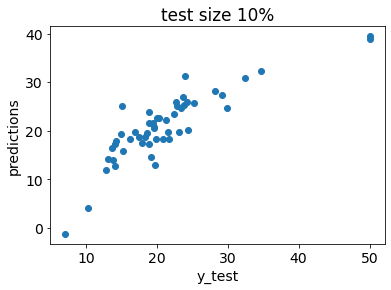

In [535]:
plt.scatter(y_test,predictions_10)
plt.title("test size 10%")
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

In [670]:
# In comparing a training test size of 30 percent to 10 percent, there was a decrease in accuracy of almost 2.9% from approx 0.69 to 0.67 respectively

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [664]:
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split

# cross validation
from sklearn.metrics import mean_squared_error
X2 = X_subset
y2 = y


k = 5
kf = KFold(n_splits=k, random_state=None)
lm = LinearRegression()



for train_index , test_index in kf.split(X2,y2):
    X_train , X_test = X2.iloc[train_index],X2.iloc[test_index]
    y_train , y_test = y2.iloc[train_index] , y2.iloc[test_index]

    lm.fit(X_train, y_train.values.ravel()) 
    lm.score(X_train,y_train)
    pred_values = lm.predict(X_test)

print(np.sqrt(mean_squared_error(pred_values,y_test))) 

5.212449359859009


In [947]:
# cross validation
from sklearn.metrics import mean_squared_error
X2 = X_subset
y2 = y


k = 10
kf = KFold(n_splits=k, random_state=None)
lm = LinearRegression()



for train_index , test_index in kf.split(X2,y2):
    X_train , X_test = X2.iloc[train_index],X2.iloc[test_index]
    y_train , y_test = y2.iloc[train_index] , y2.iloc[test_index]

    lm.fit(X_train, y_train.values.ravel()) 
    lm.score(X_train,y_train)
    pred_values = lm.predict(X_test)

print(np.sqrt(mean_squared_error(pred_values,y_test)) )


3.1432607949890348


In [ ]:
# increasing the number of folds to 10 seems optimal. if the number of folds is too large, the tradeoff is in overfitting the model. 

# KNN Practice

In [540]:
# Read the iris data into a DataFrame
import pandas as pd
import io
import requests

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
s = requests.get(url).content
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [420]:
iris.head()
%matplotlib inline
import matplotlib.pyplot as plt


# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

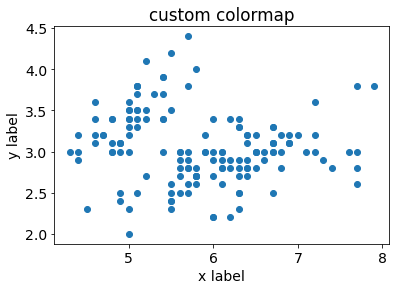

In [421]:
# Create a custom colormap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.scatter(iris['sepal_length'], iris['sepal_width'], cmap=cmap_bold)
plt.title("custom colormap")
plt.xlabel('x label')
plt.ylabel('y label')
plt.show()

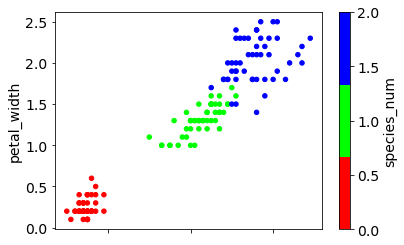

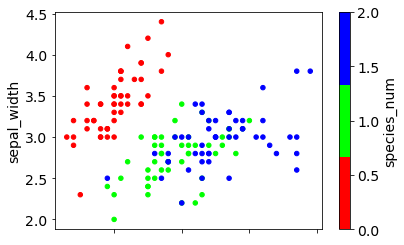

In [347]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES

iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold);
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold);

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [438]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [503]:
type(iris)
X = iris[['sepal_length','sepal_width','petal_length', 'petal_width']]


### Create your target vector "y"
This will be the species type.

In [504]:
y = iris[['species']]

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [505]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [506]:
# Model with One Neighbor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier



#instantiate


knn = KNeighborsClassifier(n_neighbors = 1)

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [507]:
#fit
#knn.fit(x_train, y_train)
knn.fit(x_train, y_train.values.ravel())

#predict
pred = knn.predict(x_test)


#score

print(metrics.accuracy_score(y_test, pred))

0.9333333333333333


### Create a Model With Five Neighbors. Did it Improve?

In [502]:
# Model with Five Neighbors improves by approx 3% from 0.93 to 0.96
knn = KNeighborsClassifier(n_neighbors = 5)
#fit
knn.fit(x_train, y_train.values.ravel())


#predict
pred = knn.predict(x_test)


#score

print(metrics.accuracy_score(y_test, pred))

print(pred_test)

0.9666666666666667
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [512]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
scores = []
val_k = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train.values.ravel())
    val_k.append(k)
    scores.append(knn.score(x_test, y_test)*100)
    print("When k is", k, "the accuracy is", knn.score(x_test, y_test)*100)


When k is 1 the accuracy is 93.33333333333333
When k is 2 the accuracy is 93.33333333333333
When k is 3 the accuracy is 96.66666666666667
When k is 4 the accuracy is 96.66666666666667
When k is 5 the accuracy is 96.66666666666667
When k is 6 the accuracy is 96.66666666666667
When k is 7 the accuracy is 96.66666666666667
When k is 8 the accuracy is 96.66666666666667
When k is 9 the accuracy is 96.66666666666667
When k is 10 the accuracy is 96.66666666666667
When k is 11 the accuracy is 96.66666666666667
When k is 12 the accuracy is 96.66666666666667
When k is 13 the accuracy is 96.66666666666667
When k is 14 the accuracy is 96.66666666666667
When k is 15 the accuracy is 96.66666666666667
When k is 16 the accuracy is 96.66666666666667
When k is 17 the accuracy is 96.66666666666667
When k is 18 the accuracy is 96.66666666666667
When k is 19 the accuracy is 96.66666666666667
When k is 20 the accuracy is 93.33333333333333
When k is 21 the accuracy is 96.66666666666667
When k is 22 the accur

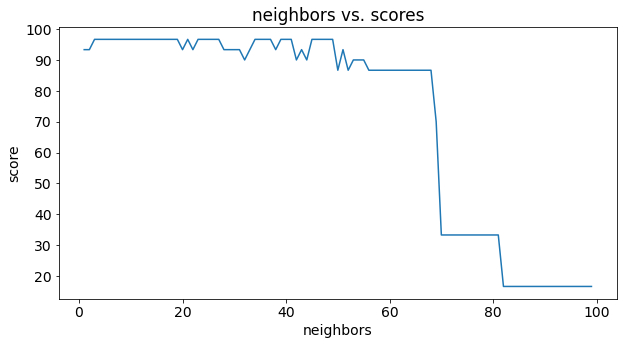

In [515]:
# plot showing the impact of the increase in neighors vs accuracy
plt.figure(figsize=(10, 5));
plt.plot(val_k, scores, label='knn full data');
plt.xlabel('neighbors');
plt.ylabel('score');
plt.title('neighbors vs. scores');

### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

In [669]:
# The predict_proba(X_new) returns the probablilities of each target class.  This is in contrast to the predict() which gives the actual prediction as to which class will occur for a given set of features.


In [549]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = iris[['sepal_length','sepal_width','petal_length', 'petal_width']]
y = iris[['species']]

lm2 = LogisticRegression(solver='lbfgs', max_iter=200)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)
lm2.fit(x_train, y_train.values.ravel())


print(lm2.score(x_test,y_test))
print(lm2.predict_proba(x_test))  #gives the probabilities of the occurrence of each target every tuple of the testing set


0.9333333333333333
[[1.12552550e-05 3.70178939e-02 9.62970851e-01]
 [9.47606658e-01 5.23932368e-02 1.05100704e-07]
 [1.16980271e-06 3.20604621e-02 9.67938368e-01]
 [6.36940787e-08 5.27483990e-03 9.94725096e-01]
 [6.83988211e-07 2.30652824e-02 9.76934034e-01]
 [5.37163993e-03 8.01748123e-01 1.92880237e-01]
 [4.49446229e-04 3.36926155e-01 6.62624398e-01]
 [9.84959757e-01 1.50402386e-02 4.59297215e-09]
 [9.64906660e-01 3.50932267e-02 1.13671442e-07]
 [5.25040926e-04 4.65441723e-01 5.34033236e-01]
 [9.45137245e-01 5.48626245e-02 1.30584741e-07]
 [9.72180810e-01 2.78191217e-02 6.80435315e-08]
 [9.71113938e-01 2.88860285e-02 3.32502024e-08]
 [3.00001723e-03 7.66747212e-01 2.30252771e-01]
 [2.32726975e-04 1.39386628e-01 8.60380645e-01]]


## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [559]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [560]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1221.
Date:                Sun, 15 Nov 2020   Prob (F-statistic):                   1.38e-321
Time:                        22:09:31   Log-Likelihood:                         -1567.5
No. Observations:                 506   AIC:                                      3151.
Df Residuals:                     498   BIC:                                      3185.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9729      0.224     22.195      0.000       4.533       5.413
LSTAT         -0.5606      0.048    -11.795      0.000      -0.654      -0.467
RAD            0.2128      0.070      3.050      0.002       0.076       0.350
TAX           -0.0174      0.004     -4.272      0.000      -0.025      -0.009
NOX            4.3448      3.384      1.284      0.200      -2.304      10.994
INDUS          0.0924      0.067      1.383      0.167      -0.039       0.224
CRIM          -0.0891      0.037     -2.423      0.016      -0.161      -0.017
ZN             0.0288      0.013      2.220      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.139   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.155
Skew:                           1.666   Prob(JB):                    1.99e-181
Kurtosis:                       8.326   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

In [936]:
from collections import OrderedDict
from itertools import product
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

case1 = X[['CRIM']].copy()
case2 = X[['ZN']].copy()
case3 = X[['INDUS']].copy()
case4 = X[['CHAS']].copy()
case5 = X[['NOX']].copy()
case6 = X[['RM']].copy()
case7 = X[['AGE']].copy()
case8 = X[['DIS']].copy()
case9 = X[['RAD']].copy()
case10 = X[['TAX']].copy()
case11 = X[['PTRATIO']].copy()
case12 = X[['B']].copy()
case13 = X[['LSTAT']].copy()


In [931]:
def regressor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y_pred = lm.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    return(r2)

print(regressor(case1,y),'CRIM')
print(regressor(case2,y),'ZN')
print(regressor(case3,y),'INDUS')
print(regressor(case4,y),'CHAS')
print(regressor(case5,y),'NOX')
print(regressor(case6,y),'RM')
print(regressor(case7,y),'AGE')
print(regressor(case8,y),'DIS')
print(regressor(case9,y),'RAD')
print(regressor(case10,y),'TAX')
print(regressor(case11,y),'PTRATIO')
print(regressor(case12,y),'B')
print(regressor(case13,y),'LSTAT')


0.15087053206913115 CRIM
0.1443206702863521 ZN
0.2461844695240648 INDUS
-0.04651996877108955 CHAS
0.19080142104872333 NOX
0.47336628730216146 RM
0.1503786777631384 AGE
0.052345387768825136 DIS
0.10462752226910577 RAD
0.21188653605114893 TAX
0.24657825921796173 PTRATIO
0.06948261813585044 B
0.4924082641190437 LSTAT


### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

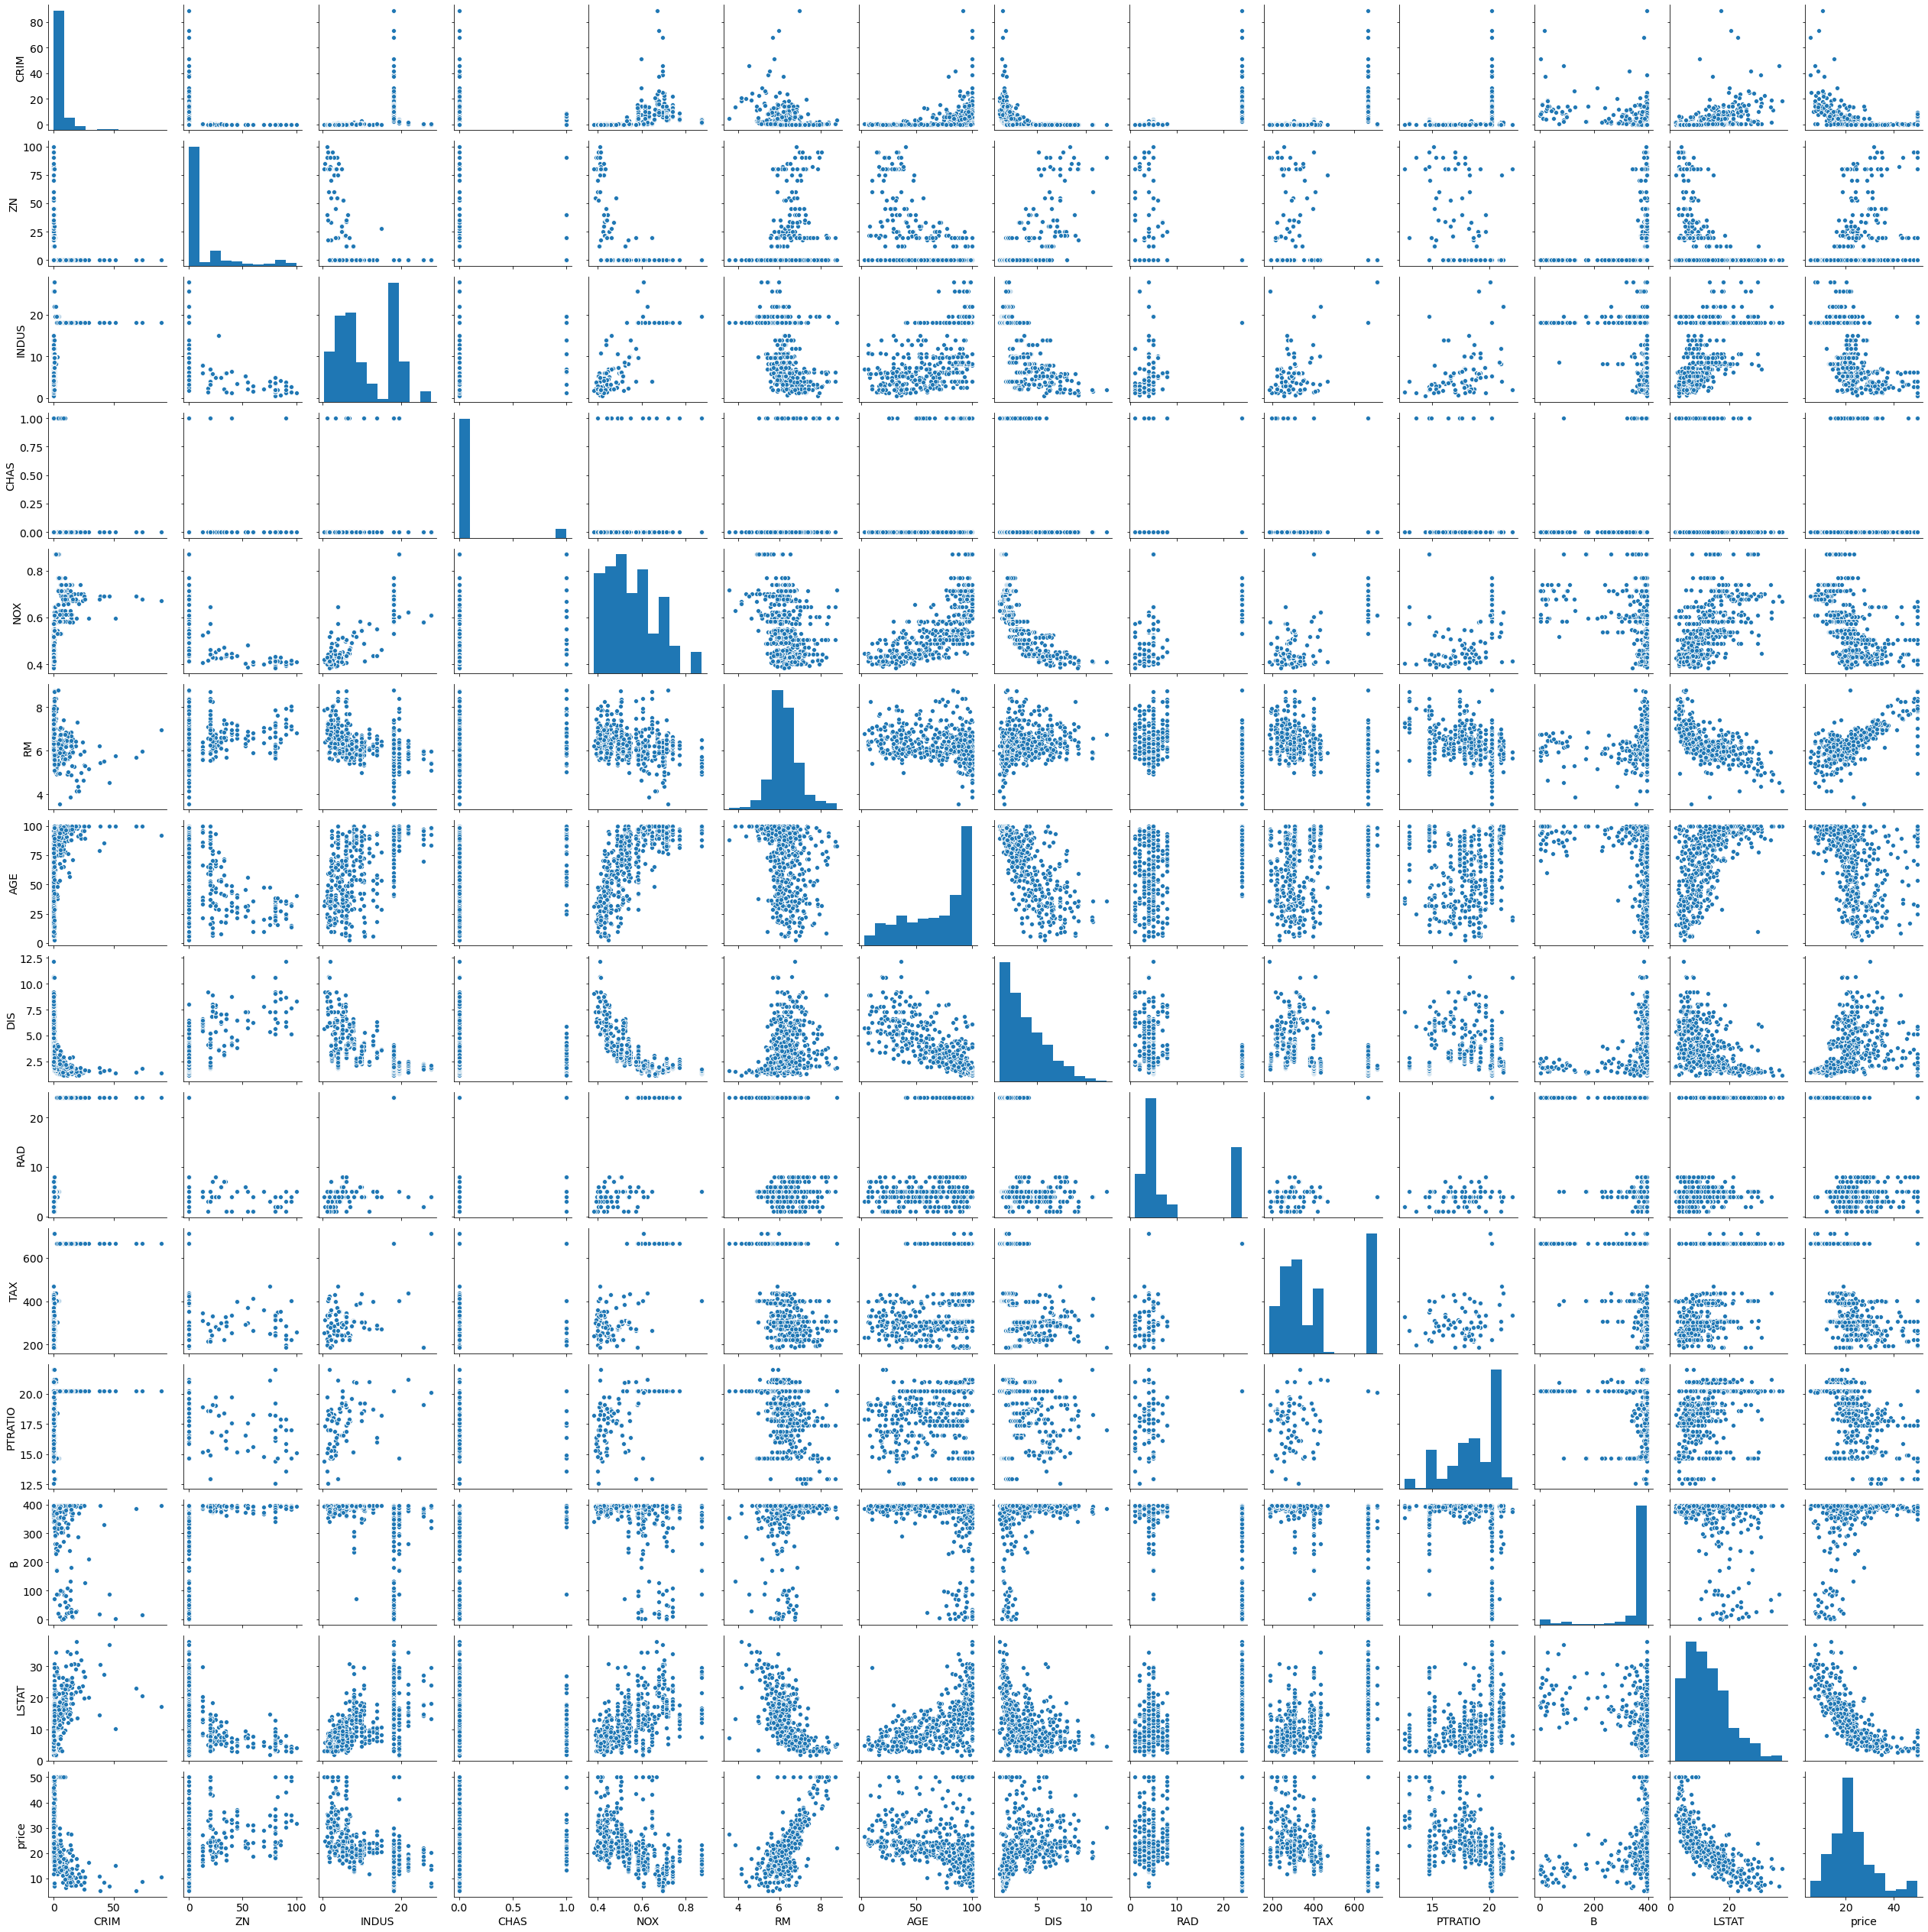

In [932]:
# Check out variable relations
import seaborn as sns

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

df3 = X
df3['price']= y


sns.pairplot(df3);

In [933]:
boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

In [935]:
# check coefficients
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# instantiate
lm = LinearRegression()

# fit
lm.fit(X_train,y_train)


cdf = lm.coef_
reshape = cdf.reshape(-1)

   
coef = pd.DataFrame(reshape,X.columns, columns=['coef'])
coef

,coef
CRIM,-0.113498
ZN,0.037998
INDUS,0.029988
CHAS,3.511320
NOX,-14.451356
RM,3.805342
AGE,-0.017955
DIS,-1.489688
RAD,0.253016
TAX,-0.010026


In [749]:
# Check out Pearson scores

from scipy import stats
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

df3 = X
df3['price']= y
df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [750]:
list1 = df3['CRIM']
list2 = df3['ZN']
list3 = df3['INDUS']
list4 = df3['CHAS']
list5 = df3['NOX']
list6 = df3['RM']
list7 = df3['AGE']
list8 = df3['DIS']
list9 = df3['RAD']
list10 = df3['TAX']
list11 = df3['PTRATIO']
list12 = df3['B']
list13 = df3['LSTAT']
listp  = df3['price']


CRIM_L, _ = pearsonr(list1, listp) 
ZN_L, _ = pearsonr(list2, listp)
INDUS_L, _ = pearsonr(list3, listp)
CHAS_L, _ = pearsonr(list4, listp)
NOX_L, _ = pearsonr(list5, listp)
RM_L, _ = pearsonr(list6, listp)
AGE_L, _ = pearsonr(list7, listp)
DIS_L, _ = pearsonr(list8, listp)
RAD_L, _ = pearsonr(list9, listp)
TAX_L, _ = pearsonr(list10, listp)
PTRATIO_L, _ = pearsonr(list11, listp)
B_L, _ = pearsonr(list12, listp)
LSTAT_L, _ = pearsonr(list13, listp)

print('Pearsons correlation: %.3f' % CRIM_L, 'CRIM')
print('Pearsons correlation: %.3f' % ZN_L, 'ZN')
print('Pearsons correlation: %.3f' % INDUS_L, 'INDUS')
print('Pearsons correlation: %.3f' % CHAS_L, 'CHAS')
print('Pearsons correlation: %.3f' % NOX_L, 'NOX')
print('Pearsons correlation: %.3f' % RM_L, 'RM')
print('Pearsons correlation: %.3f' % AGE_L, 'AGE')
print('Pearsons correlation: %.3f' % DIS_L, 'DIS')
print('Pearsons correlation: %.3f' % RAD_L, 'RAD')
print('Pearsons correlation: %.3f' % TAX_L, 'TAX')
print('Pearsons correlation: %.3f' % PTRATIO_L, 'PTRATIO')
print('Pearsons correlation: %.3f' % B_L, 'B')
print('Pearsons correlation: %.3f' % LSTAT_L, 'LSTAT')




Pearsons correlation: -0.388 CRIM
Pearsons correlation: 0.360 ZN
Pearsons correlation: -0.484 INDUS
Pearsons correlation: 0.175 CHAS
Pearsons correlation: -0.427 NOX
Pearsons correlation: 0.695 RM
Pearsons correlation: -0.377 AGE
Pearsons correlation: 0.250 DIS
Pearsons correlation: -0.382 RAD
Pearsons correlation: -0.469 TAX
Pearsons correlation: -0.508 PTRATIO
Pearsons correlation: 0.333 B
Pearsons correlation: -0.738 LSTAT


In [ ]:
# based on the pairplot, coef and Peasons, NOX appears to be another feature that could be useful for predicting 

## Demo: Patsy

In [612]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [613]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [615]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.6058424983039378
